In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
cancer = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data')
cancer.columns=['ID', 'Clump_Thickness', 'U_Cell_Size', 'U_Cell_Shape','Marg_Adhes', 'Epi_Cell_Size', 'Bare_Nuc', 'Chromatin', 'Nucleoli','Mitoses', 'Class']
cancer = cancer[~((cancer['Bare_Nuc'] == '?' ))].astype(float)
cols=['Clump_Thickness', 'U_Cell_Size', 'U_Cell_Shape','Marg_Adhes', 'Epi_Cell_Size', 'Bare_Nuc', 'Chromatin', 'Nucleoli','Mitoses']
X_train,X_test,Y_train,Y_test = train_test_split(cancer[cols],cancer['Class'],random_state=42)
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,Y_train)
print("Accuracy on the training set: %.3f" % tree.score(X_train,Y_train))
print("Accuracy on the testing set: %.3f" % tree.score(X_test,Y_test))

Accuracy on the training set: 0.980
Accuracy on the testing set: 0.959


In [19]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="mytree.dot", class_names=["malignant", "benign"],
feature_names=cancer[cols].columns, impurity=False, filled=True)

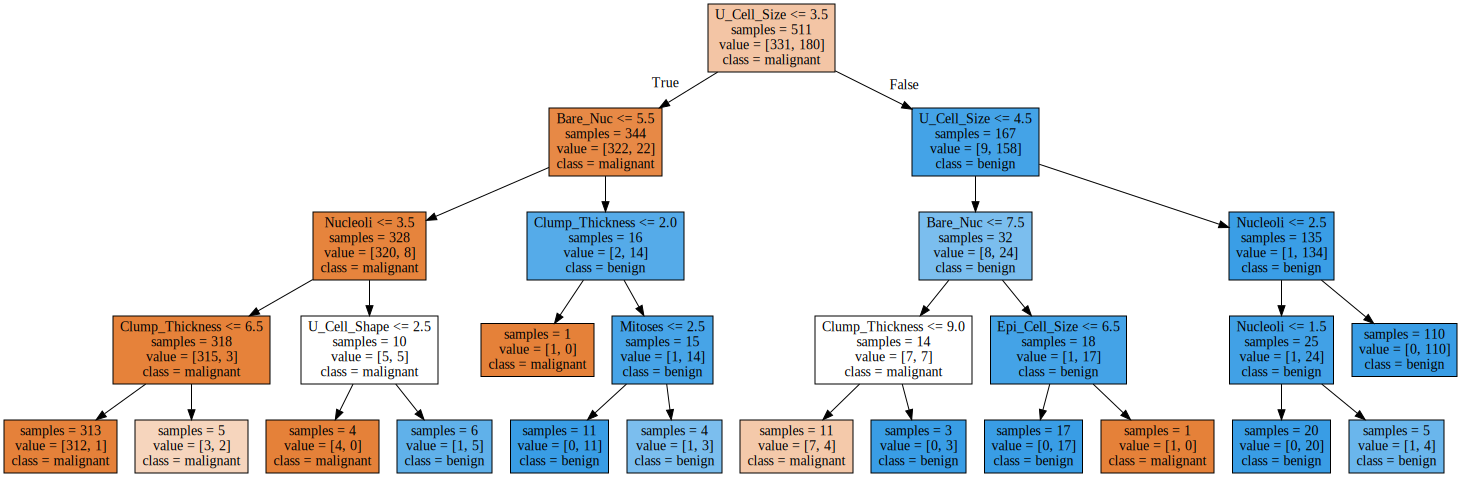

In [25]:
import graphviz
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


In [26]:
tree.feature_importances_

array([ 0.02325862,  0.81309811,  0.01522497,  0.        ,  0.00862748,
        0.1150432 ,  0.        ,  0.02307288,  0.00167475])

In [27]:
import matplotlib.pyplot as plt


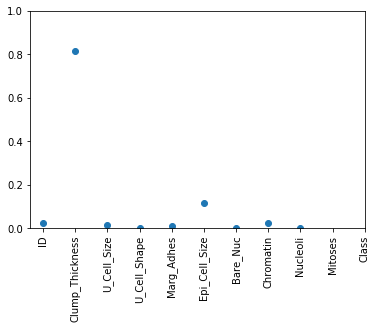

In [28]:
plt.plot(tree.feature_importances_, 'o')
plt.xticks(range(cancer.shape[1]), cancer.columns, rotation=90)
plt.ylim(0, 1)
plt.show()

Feature importances: [ 0.  1.]


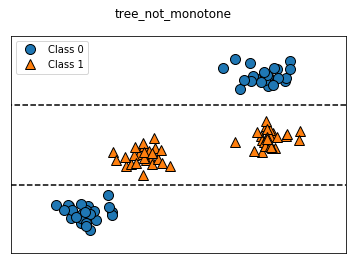

In [30]:
import mglearn
tree = mglearn.plots.plot_tree_not_monotone()
plt.suptitle("tree_not_monotone")
plt.show()

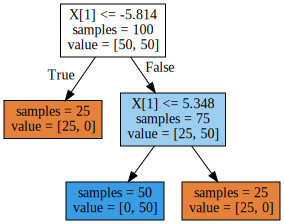

In [31]:
tree